In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [2]:
intentData = "Cleaned_Drug Poisoning deaths and rates .csv"

data = pd.read_csv(intentData)

df = pd.DataFrame(data)

df

,Year,Gender,Intent,Intent.1,Drug type,< 1 year,1-4 years,5-14 years,15-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85+ years,Not stated,All ages
0,2021,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",All drugs,75,126,7426,24070,26908,21875,108,19399,5646,800,256,10.0,106699
1,2021,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Any Opioid,43,104,6312,20279,21100,15599,72,13080,3420,312,82,8.0,80411
2,2021,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Benzodiazepines,0,0,1118,3056,3203,2374,0,2016,595,91,39,7.0,12499
3,2021,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Cannabis,0,0,147,331,295,210,0,153,22,0,0,1.0,1159
4,2021,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Cocaine,0,12,1157,4794,6025,5722,0,5411,1275,81,0,9.0,24486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,1999,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup - heroin,0,0,0,135,294,598,382,55,9,4,1,1.0,1479
1376,1999,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup - methadone,0,0,0,35,88,187,101,13,3,0,0,0.0,427
1377,1999,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup – including fentanyl,0,0,0,23,43,103,56,17,5,2,0,0.0,249
1378,1999,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup – including oxycodone and hydr...,0,1,2,110,329,639,410,60,19,2,0,2.0,1574


In [3]:
yearsList = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [4]:
yearsBool = df.Year.isin(yearsList)
yearsBool
yearsDf = df[yearsBool]
yearsDf

,Year,Gender,Intent,Intent.1,Drug type,< 1 year,1-4 years,5-14 years,15-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85+ years,Not stated,All ages
60,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",All drugs,65,70,112,7095,21784,22710,"18,919",15819,4291,655,263,16.0,91799
61,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Any Opioid,24,58,61,5986,18239,17666,"13,258",10445,2554,254,76,9.0,68630
62,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Benzodiazepines,1,1,6,1267,3073,3069,"2,287",1933,535,84,34,0.0,12290
63,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Cannabis,1,0,1,149,300,270,171,114,22,0,0,0.0,1028
64,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Cocaine,3,1,1,1089,4366,4796,"4,487",3807,842,50,3,2.0,19447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup - heroin,0,0,0,1026,2563,1775,"1,442",805,106,4,1,0.0,7722
476,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup - methadone,0,1,1,162,484,408,403,317,40,2,0,0.0,1818
477,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup – including fentanyl,1,1,1,335,970,708,665,329,37,4,1,0.0,3052
478,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup – including oxycodone and hydr...,1,2,6,477,1289,1269,"1,531",990,150,17,3,1.0,5736


In [5]:
yearsDf.dtypes


Year             int64
Gender          object
Intent          object
Intent.1        object
Drug type       object
< 1 year         int64
1-4 years        int64
5-14 years       int64
15-24 years      int64
25-34 years      int64
35-44 years      int64
45-54 years     object
55-64 years      int64
65-74 years      int64
75-84 years      int64
85+ years        int64
Not stated     float64
All ages         int64
dtype: object

In [6]:
yearsDf['Drug type'].count()

420

In [8]:
rejectedDrugs = ['All drugs', 'Benzodiazepines', 'Cannabis', 'Cocaine', 'Psychostimulants – incl. methamphetamine']
rejectedDrugs_s = yearsDf['Drug type'].isin(rejectedDrugs)
rejectedDrugs_s

60      True
61     False
62      True
63      True
64      True
       ...  
475    False
476    False
477    False
478    False
479     True
Name: Drug type, Length: 420, dtype: bool

In [9]:
opioidDf = yearsDf[~rejectedDrugs_s] #with or without loc same output
opioidDf

,Year,Gender,Intent,Intent.1,Drug type,< 1 year,1-4 years,5-14 years,15-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85+ years,Not stated,All ages
61,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Any Opioid,24,58,61,5986,18239,17666,"13,258",10445,2554,254,76,9.0,68630
65,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Opioid subgroup - heroin,2,2,2,711,3586,3477,"2,639",2160,555,29,1,1.0,13165
66,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Opioid subgroup - methadone,2,12,5,130,604,903,805,809,262,9,0,2.0,3543
67,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Opioid subgroup – including fentanyl,19,41,43,5393,15854,14906,"10,734",7777,1623,103,16,7.0,56516
68,2020,Both sexes,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Opioid subgroup – including oxycodone and hydr...,4,5,13,693,2784,3243,"2,831",2815,867,153,60,3.0,13471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,2014,Male,Preventable/accidental,Preventable/accidental,Any Opioid,2,4,6,1850,4760,3704,"3,631",2219,317,27,6,1.0,16527
475,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup - heroin,0,0,0,1026,2563,1775,"1,442",805,106,4,1,0.0,7722
476,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup - methadone,0,1,1,162,484,408,403,317,40,2,0,0.0,1818
477,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup – including fentanyl,1,1,1,335,970,708,665,329,37,4,1,0.0,3052


In [10]:
drugDf = yearsDf[['Year', 'Drug type', 'All ages']]
drugDf

,Year,Drug type,All ages
60,2020,All drugs,91799
61,2020,Any Opioid,68630
62,2020,Benzodiazepines,12290
63,2020,Cannabis,1028
64,2020,Cocaine,19447
...,...,...,...
475,2014,Opioid subgroup - heroin,7722
476,2014,Opioid subgroup - methadone,1818
477,2014,Opioid subgroup – including fentanyl,3052
478,2014,Opioid subgroup – including oxycodone and hydr...,5736


In [11]:
# df analysis
# start at no age (All ages)
#use Year as contious variable for x axis 
drugDf['All ages'].sum()
yearGroup = drugDf.groupby(['Year'])['All ages'].sum()
yearGroup

Year
2014     465604
2015     546388
2016     708848
2017     819805
2018     817896
2019     870342
2020    1173032
Name: All ages, dtype: int64

In [12]:
drugGroupby = drugDf.groupby(['Year'], as_index=False)['All ages'].sum()
drugGroupby = drugGroupby.rename(columns={'All ages' : 'deaths'})
drugGroupby['Type'] = ['General', 'General', 'General', 'General', 'General', 'General', 'General']
drugGroupby

,Year,deaths,Type
0,2014,465604,General
1,2015,546388,General
2,2016,708848,General
3,2017,819805,General
4,2018,817896,General
5,2019,870342,General
6,2020,1173032,General


In [13]:
opioidGroupby = opioidDf.groupby(['Year'], as_index=False)['All ages'].sum()
opioidGroupby = opioidGroupby.rename(columns={'All ages' : 'deaths'})
opioidGroupby['Type'] = ['Opioid', 'Opioid', 'Opioid', 'Opioid', 'Opioid', 'Opioid', 'Opioid']
opioidGroupby

,Year,deaths,Type
0,2014,226312,Opioid
1,2015,271078,Opioid
2,2016,360408,Opioid
3,2017,416664,Opioid
4,2018,415872,Opioid
5,2019,440228,Opioid
6,2020,601886,Opioid


In [14]:
mergeDf = pd.concat([drugGroupby, opioidGroupby], ignore_index=False)
mergeDf

,Year,deaths,Type
0,2014,465604,General
1,2015,546388,General
2,2016,708848,General
3,2017,819805,General
4,2018,817896,General
5,2019,870342,General
6,2020,1173032,General
0,2014,226312,Opioid
1,2015,271078,Opioid
2,2016,360408,Opioid


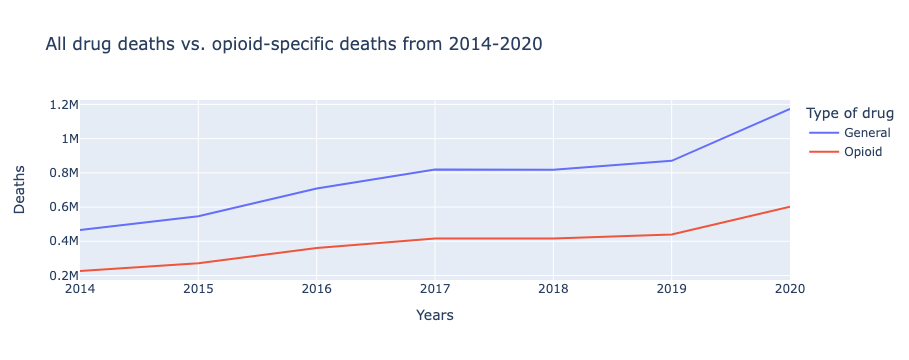

In [36]:
px.line(mergeDf, x="Year", y="deaths", color="Type",
       title="All drug deaths vs. opioid-specific deaths from 2014-2020",
       labels={
                     "Year": "Years",
                     "deaths": "Deaths",
                     "Type": "Type of drug"
                 })


In [18]:
rejectedDrugs = ['All drugs', 'Benzodiazepines', 'Cannabis', 'Cocaine', 'Psychostimulants – incl. methamphetamine']
rejectedDrugs_s = yearsDf['Drug type'].isin(rejectedDrugs)
rejectedDrugs_s

60      True
61     False
62      True
63      True
64      True
       ...  
475    False
476    False
477    False
478    False
479     True
Name: Drug type, Length: 420, dtype: bool

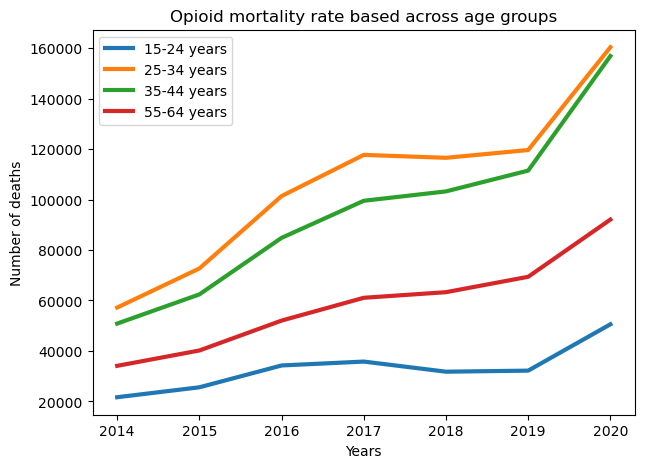

In [19]:
yearCols = yearsDf.columns[8:13]
opioidDf.groupby(['Year'])[yearCols].sum().plot(legend=True, figsize = [7,5], title="Opioid mortality rate based across age groups", xlabel="Years", ylabel="Number of deaths", linewidth="3");

In [21]:
# df = px.data.tips()
genderDf = opioidDf[opioidDf["Gender"] != "Both sexes"]
# genderDf = genderDf.groupby(['Year', 'Gender'], as_index=False)['25-34 years'].sum()
# genderDf

In [22]:
genderGroup = genderDf.groupby(['Year', 'Gender'])['25-34 years'].sum()
genderGroup

Year  Gender
2014  Female     7685
      Male      20915
2015  Female     9537
      Male      26803
2016  Female    13481
      Male      37201
2017  Female    15978
      Male      42866
2018  Female    16232
      Male      42032
2019  Female    16978
      Male      42827
2020  Female    22043
      Male      58128
Name: 25-34 years, dtype: int64

In [23]:
stackedGender = genderGroup.unstack(level=1)
stackedGender

Gender,Female,Male
Year,,
2014,7685,20915
2015,9537,26803
2016,13481,37201
2017,15978,42866
2018,16232,42032
2019,16978,42827
2020,22043,58128


In [24]:
femaleList = list(stackedGender.Female.values)
maleList = list(stackedGender.Male.values)
yearList = list(stackedGender.Male.index)
#put differences (men are x time more affected by death compared to women)

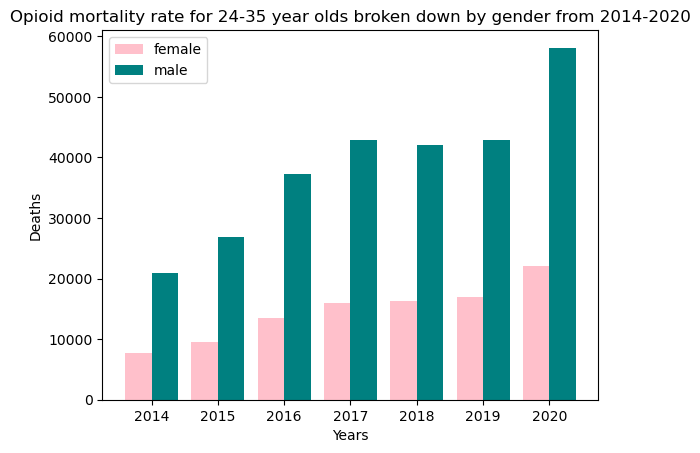

In [37]:
# create data
x_axis = np.arange(len(yearList))
x = yearList
y1 = femaleList
y2 = maleList
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x_axis-0.2, y1, width, label ="female", color="pink")
plt.bar(x_axis+0.2, y2, width, label ="male", color="teal")
plt.xticks(x_axis, x);
plt.xlabel("Years");
plt.ylabel("Deaths");
plt.legend();
plt.title("Opioid mortality rate for 24-35 year olds broken down by gender from 2014-2020");

In [26]:
drugType = drugDf['Drug type']
allAges = drugDf['All ages']

drugGroup = drugDf.groupby(['Drug type'])['All ages'].sum()
drugGroup

drugArray = [(k, v) for k, v in drugGroup.items()]
drugArray

[('All drugs', 1733420),
 ('Any Opioid', 1208676),
 ('Benzodiazepines', 266344),
 ('Cannabis', 17340),
 ('Cocaine', 337526),
 ('Opioid subgroup - heroin', 378462),
 ('Opioid subgroup - methadone', 85550),
 ('Opioid subgroup – including fentanyl', 721194),
 ('Opioid subgroup – including oxycodone and hydrocodone', 338566),
 ('Psychostimulants – incl. methamphetamine', 314837)]

In [27]:
# genderDf
maleDf = genderDf[genderDf['Gender'] == 'Male']
maleDf

,Year,Gender,Intent,Intent.1,Drug type,< 1 year,1-4 years,5-14 years,15-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85+ years,Not stated,All ages
101,2020,Male,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Any Opioid,13,32,33,4402,13252,12638,"9,184",7138,1790,137,32,9.0,48660
105,2020,Male,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Opioid subgroup - heroin,2,2,1,481,2621,2611,"2,000",1672,465,24,1,1.0,9881
106,2020,Male,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Opioid subgroup - methadone,1,7,2,101,376,519,456,475,186,7,0,2.0,2132
107,2020,Male,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Opioid subgroup – including fentanyl,11,23,25,3965,11632,10907,"7,749",5632,1252,56,7,7.0,41266
108,2020,Male,"All (preventable, intentional, undetermined)","All (preventable, intentional, undetermined)",Opioid subgroup – including oxycodone and hydr...,1,2,6,497,1844,2063,"1,603",1584,484,74,24,3.0,8185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,2014,Male,Preventable/accidental,Preventable/accidental,Any Opioid,2,4,6,1850,4760,3704,"3,631",2219,317,27,6,1.0,16527
475,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup - heroin,0,0,0,1026,2563,1775,"1,442",805,106,4,1,0.0,7722
476,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup - methadone,0,1,1,162,484,408,403,317,40,2,0,0.0,1818
477,2014,Male,Preventable/accidental,Preventable/accidental,Opioid subgroup – including fentanyl,1,1,1,335,970,708,665,329,37,4,1,0.0,3052


In [28]:
maleGroup = maleDf.groupby(['Year', 'Drug type'], as_index=False)['All ages'].sum()

In [29]:
maleGroup

,Year,Drug type,All ages
0,2014,Any Opioid,34947
1,2014,Opioid subgroup - heroin,15882
2,2014,Opioid subgroup - methadone,3827
3,2014,Opioid subgroup – including fentanyl,6517
4,2014,Opioid subgroup – including oxycodone and hydr...,12468
5,2015,Any Opioid,41371
6,2015,Opioid subgroup - heroin,19232
7,2015,Opioid subgroup - methadone,3688
8,2015,Opioid subgroup – including fentanyl,12588
9,2015,Opioid subgroup – including oxycodone and hydr...,13251


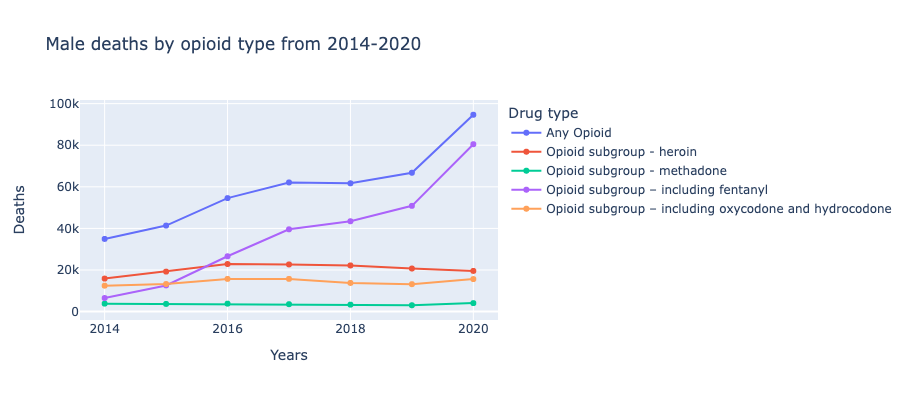

In [33]:
# df = px.data.tips()
fig = px.line(maleGroup, x="Year", y="All ages", color="Drug type", markers=True, width=900, height=400, 
              title="Male deaths by opioid type from 2014-2020",
             labels={
                     "Year": "Years",
                     "All ages": "Deaths"
                 })

fig.show()